# Projeto Final - Monitoração Aplicações Web

# Márcio Lucena Magalhães

### Define o diretório de trabalho

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Diretório onde estão os arquivos no drive
import os
workdir_path = '/content/drive/My Drive/PosPUC_BI_Master/Projeto Final - Monitoração Aplicações Web/Entregar/Logins/Booking/analisarEntrega'   
os.chdir(workdir_path)

Mounted at /content/drive


### Instala todas as bibliotecas necessárias

In [ ]:
# Bibliotecas para o Selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install, update para máquina virtual
!apt install chromium-chromedriver # Necessário instalar um webdriver, no caso um do Google Chrome
#!cp /usr/lib/chromium-browser/chromedriver /usr/bin

# Bibliotecas para dataframe, tempo, requisições
from datetime import datetime
import requests
import pandas as pd
import time
from pytz import timezone

from selenium import webdriver #CHAMADA DO SELENIUM UTILIZANDO O WEBDRIVER
from selenium.webdriver.common.keys import Keys # intanciando uma sub-biblioteca para teclas de atalho:ctr, alt, shift...
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import *

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

# Funções e Dataframe

In [ ]:
# Credenciais de login no Booking
login = 'alunobimaster@bol.com.br'
password = 'BiMaster&20192'
site = 'https://www.booking.com'

In [ ]:
# criando um dataframe
dados = pd.DataFrame(columns=['Contador','DTHrInicio','DTHrFinal','TempoLogin', 'Mensagem'])
Contador = 0
Msg = "nenhum"

In [ ]:
# Função para converter a data e hora para a cidade de Fortaleza
def converteTempo():
  data_e_hora_atuais = datetime.now()
  fuso_horario = timezone('America/Fortaleza') # Considero o fuso horário de Fortaleza
  data_e_hora_fortaleza = data_e_hora_atuais.astimezone(fuso_horario)
  data_e_hora_fortaleza_em_texto = data_e_hora_fortaleza.strftime('%d/%m/%Y %H:%M:%S')
  return data_e_hora_fortaleza_em_texto

In [ ]:
# Função para calcular a diferença de tempo em segundos
def difTempo():
  formato = '%d/%m/%Y %H:%M:%S'
  diferenca  = int( (datetime.strptime(DTHrFinal, formato) - datetime.strptime(DTHrInicio, formato)).total_seconds()) 
  return diferenca

In [ ]:
# Função para testar a página URL
def testeURL(url):
  response = requests.get(url)
  Codigo = response.status_code
  return Codigo

In [ ]:
# Função de Importação de funçoes básicas e mapeando o webdriver
def WebBrowser():
  import sys
  sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver') #LOCALIZAÇÃO DO WEBDRIVER

  # Argumentos passados para não ter problema no google Colaboraty
  chrome_options = webdriver.ChromeOptions()

  chrome_options.add_argument('--headless') # Para não ter uma execução passo-a-passo do procedimento que está sendo executado
  chrome_options.add_argument('--no-sandbox') # Para não ter uma execução passo-a-passo do procedimento que está sendo executado
  chrome_options.add_argument('--disable-dev-shm-usage')
  # Os três parâmentos acima podem ser retirados se for executado localmente

  chrome_options.add_argument("--disable-notifications") # Evitar popup na página
  chrome_options.add_argument("--disable-popup-blocking")

  chrome_options.add_argument('--start-maximized') # Para o navegador abrir em tela cheia
  chrome_options.add_argument('user-agent=Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36')
  chrome_options.add_argument('--ignore-certificate-errors') # Ignorar warnings e certificados
  Browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options, service_args=['--verbose', '--log-path=/tmp/chromedriver.log'])
  # Carrega o WebDriver com os parâmetros
  # '--log-path=/tmp/chromedriver.log' SALVA O LOG DE EXECUÇÃO DO CÓDIGO NO DIRETÓRIO CITADO

  return Browser

In [ ]:
# Procedimento  de teste de login
def loginURL():
  wd = WebBrowser()  
  wait = WebDriverWait(wd, 10, poll_frequency=1, ignored_exceptions=[ElementNotVisibleException, ElementNotSelectableException]) # Espera até 10 segundos para saber se objeto foi carregado
  wd.delete_all_cookies() # Apaga os cookies
  wd.get(site) # carrega a página da url
  wd.title # Título da página corrente
  wd.get_window_size() # Obtém a largura e a altura da janela corrente
  wd.set_window_size(1920,1080) # Altera a largura e altura da janela atual. (window.resizeTo)
  wd.save_screenshot("booking.png") # Captura a tela atual
  try:
    id_botao_login = wait.until(EC.element_to_be_clickable((By.LINK_TEXT,"Sign in")))
    id_botao_login.click() # Executa a ação de clicar no botão
    wd.save_screenshot("booking1.png") # Captura a tela atual
  except:
    print("objeto não encontrado: Sign in")
    Msg = "objeto não encontrado: Sign in"
    wd.quit() 
  try:
    id_login = wait.until(EC.element_to_be_clickable((By.ID,"username")))
    id_login.send_keys(login) # Preenche o formulário com o login
    wd.save_screenshot("booking2.png") # Captura a tela atual
    id_login.send_keys(Keys.ENTER) # Pressiona o botão para submeter o formulário
    wd.save_screenshot("booking3.png")
  except:
    print("objeto não encontrado: username")
    Msg = "objeto não encontrado: username"
    wd.quit() 
  try: 
    id_passwd = wait.until(EC.element_to_be_clickable((By.ID,"password")))
    id_passwd.send_keys(password) # Preenche o formulário com o password
    wd.save_screenshot("booking4.png") # Captura a tela atual
    id_passwd.send_keys(Keys.ENTER) # Pressiona o botão para submeter o formulário
    wd.save_screenshot("booking5.png") # Captura a tela atual
  except:
    print("objeto não encontrado:password")
    Msg = "objeto não encontrado:password"
    wd.quit() 
  try:
    id_botao_conta = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,"bui-avatar-block__text"))) # Encontra um elemento da página após o login
    wd.save_screenshot("booking6.png") # Captura a tela atual
    if (id_botao_conta.text[13:27] == 'Genius Level 1' ):
      Msg = "Login efetuado com sucesso"
      print("Login efetuado com sucesso")
      wd.quit() 
    else:
      print("Problema no login")
      Msg = "Problema no login"
      wd.quit() # Closes the browser and shuts down the ChromeDriver executable that is started when starting the ChromeDriver 
  except:
    wd.save_screenshot("robô identificado.png")
    print("robô identificado")
    Msg = "robô identificado" 
    # Tratamento do Click and Hold
    from selenium.webdriver.common.action_chains import ActionChains
    action = ActionChains(wd)
    id_robot = wd.find_element_by_id("px-captcha") #botao captcha
    cont = 0
    while (cont < 10): # O tempo de manter o Press and Hold varia, por isso 10 tentativas
      ActionChains(wd).click_and_hold(id_robot).perform()
      cont += 1
      wd.save_screenshot("passo " + str(cont) +".png")
      time.sleep(1)
    # Fim do tratamento Click and Hold
    wd.quit() 
  return Msg
   

# Loop do teste de login

In [ ]:
while (Contador < 10):
  if (testeURL(site) == 200):
    time.sleep(60) # Realizar o teste a cada 1 minuto
    DTHrInicio = converteTempo()
    Msg = loginURL()
    DTHrFinal = converteTempo()
    TempoLogin = difTempo()
    new_row = {'Contador':Contador,'DTHrInicio':DTHrInicio,'DTHrFinal':DTHrFinal,'TempoLogin':TempoLogin,'Mensagem':Msg}
    dados = dados.append(new_row,ignore_index=True)
    Contador += 1
    print(Contador)  
  else:
    print("Problema no site: " + str(testeURL(site)))
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


robô identificado
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


Login efetuado com sucesso
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


robô identificado
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


robô identificado
4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


Login efetuado com sucesso
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


Login efetuado com sucesso
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


Login efetuado com sucesso
7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


Login efetuado com sucesso
8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


Login efetuado com sucesso
9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


robô identificado
10


In [ ]:
dados

,Contador,DTHrInicio,DTHrFinal,TempoLogin,Mensagem
0,0,05/10/2021 20:36:52,05/10/2021 20:37:26,34,robô identificado
1,1,05/10/2021 20:38:28,05/10/2021 20:38:41,13,Login efetuado com sucesso
2,2,05/10/2021 20:39:42,05/10/2021 20:40:16,34,robô identificado
3,3,05/10/2021 20:41:17,05/10/2021 20:41:51,34,robô identificado
4,4,05/10/2021 20:42:52,05/10/2021 20:43:04,12,Login efetuado com sucesso
5,5,05/10/2021 20:44:06,05/10/2021 20:44:18,12,Login efetuado com sucesso
6,6,05/10/2021 20:45:20,05/10/2021 20:45:32,12,Login efetuado com sucesso
7,7,05/10/2021 20:46:33,05/10/2021 20:46:46,13,Login efetuado com sucesso
8,8,05/10/2021 20:47:47,05/10/2021 20:47:59,12,Login efetuado com sucesso
9,9,05/10/2021 20:49:00,05/10/2021 20:49:33,33,robô identificado


In [ ]:
# dados retirando as linha identificadas com robô
dadosSR = dados.query("Mensagem=='Login efetuado com sucesso'")

In [ ]:
dadosSR

,Contador,DTHrInicio,DTHrFinal,TempoLogin,Mensagem
1,1,05/10/2021 20:38:28,05/10/2021 20:38:41,13,Login efetuado com sucesso
4,4,05/10/2021 20:42:52,05/10/2021 20:43:04,12,Login efetuado com sucesso
5,5,05/10/2021 20:44:06,05/10/2021 20:44:18,12,Login efetuado com sucesso
6,6,05/10/2021 20:45:20,05/10/2021 20:45:32,12,Login efetuado com sucesso
7,7,05/10/2021 20:46:33,05/10/2021 20:46:46,13,Login efetuado com sucesso
8,8,05/10/2021 20:47:47,05/10/2021 20:47:59,12,Login efetuado com sucesso


#Gráfico

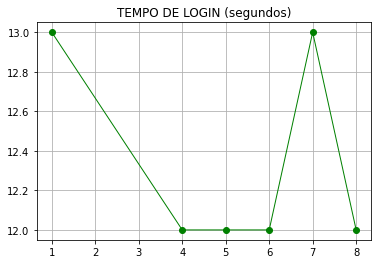

In [ ]:
import matplotlib.pyplot as plt

# Criando um gráfico de linha
#plt.plot(x, y, label = 'MAPE',color='g', marker='o', linestyle='--', linewidth=2)
plt.title("TEMPO DE LOGIN (segundos)")
plt.plot(dadosSR['TempoLogin'], color='g', marker='o', linestyle='solid', linewidth=1)

plt.grid() # Exibe grid no gráfico
plt.show() # Exibindo o gráfico gerado

# Resultado

In [ ]:
desempenho = str(round(dadosSR['TempoLogin'].mean(),2)) # média do campo citado com 2 casas decimais e convertido para texto

In [ ]:
print("Desempenho médio de login: " + desempenho + " segundos ")

Desempenho médio de login: 12.33 segundos 
